## Analyzing how different categories of consumer spending changed during the 2020 pandemic

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The data is very messy. I chose to clean it all in one loop.

In [2]:
data = []
row_labels = []
with open('pandemic_consumer_spending.csv') as f:
    for i,line in enumerate(f.read().split('\n')):
        
        # handle the first line, which has Q1, Q2, etc.
        if i == 0: 
            column_labels = line.strip().strip(',').split(',')
        
        # handle the second line, which has 2019, 2020, etc.
        elif i == 1:
            split_line = line.strip().strip(',').split(',')
            for j in range(len(column_labels)):
                column_labels[j] += ' ' + split_line[j]
        # omit line 2, since it's not important
        # handle lines 3 onward, which contain a column label in position 1 followed by data
        if i > 2:
            split_line = line.strip().strip(',').split(',')
            if len(split_line) < 2: continue
            row_labels.append(split_line[1].strip())
            # convert the data from strings to floats
            row_data = []
            for number_str in split_line[2:]:
                row_data.append(float(number_str))
            # append the rows to data
            data.append(row_data)
# convert data into a numpy array
data = np.array(data)

In [7]:
print(row_labels) 
print(column_labels) 
print(data)

['Personal consumption expenditures (PCE)', 'Goods', 'Durable goods', 'Motor vehicles and parts', 'Furnishings and durable household equipment', 'Recreational goods and vehicles', 'Other durable goods', 'Nondurable goods', 'Food and beverages purchased for off-premises consumption', 'Clothing and footwear', 'Gasoline and other energy goods', 'Other nondurable goods', 'Services', 'Household consumption expenditures (for services)', 'Housing and utilities', 'Health care', 'Transportation services', 'Recreation services', 'Food services and accommodations', 'Financial services and insurance', 'Other services', 'Final consumption expenditures of nonprofit institutions serving households (NPISHs)', 'Gross output of nonprofit institutions', 'Less: Receipts from sales of goods and services by nonprofit institutions', 'PCE excluding food and energy', 'Energy goods and services', 'Market-based PCE6', 'Market-based PCE excluding food and energy', 'Personal consumption expenditures', 'Household c

In [8]:
print(data.shape)

(46, 11)


The rows correspond to spending types, while the columns correspond to quarters.

In [9]:
row_means = np.mean(data, axis=1)
row_stds = np.std(data, axis=1)

In [10]:
q2_index = column_labels.index('2020 Q2')
q2_data = data[:,q2_index]

### Comparing the spending before Q2 2020 and after Q2 2020

In [11]:
pre_pandemic_means = np.mean(data[:, :q2_index], axis=1)
pre_pandemic_stds = np.std(data[:, :q2_index], axis=1)
post_pandemic_means = np.mean(data[:, q2_index+1:], axis=1)
post_pandemic_stds = np.std(data[:, q2_index+1:], axis=1)

In [12]:
percent_differences = 100 * (data[:,q2_index] - row_means)/data[:,q2_index]

In [13]:
# get the above average rows
print('Above average:')
for i in range(len(row_labels)):
    if percent_differences[i] > 0:
        print(row_labels[i], round(percent_differences[i], 2), '%')

Above average:
Food and beverages purchased for off-premises consumption 2.3 %
Housing and utilities 0.4 %
Final consumption expenditures of nonprofit institutions serving households (NPISHs) 17.19 %
Food and beverages purchased for off-premises consumption 2.3 %
Housing utilities and fuels 0.29 %
Net foreign travel and expenditures abroad by U.S. residents 96.81 %
Final consumption expenditures of nonprofit institutions serving households (NPISHs) 17.19 %


Hmmm that's strange. The net foreign travel and expenditures went way up! Why is that?

In [14]:
data[row_labels.index('Net foreign travel and expenditures abroad by U.S. residents')]

array([-12932.,  -6534.,  -1014.,   2377.,  -2447., -28351., -10296.,
         3072.,  -4135.,   6631.,  43670.])

It's because all the numbers are actually negative. Percentage difference only measures magnitude, since the negative in the numerator and denominator cancel out. Let's not worry about that row in our analysis.

In [15]:
# get the below average rows
print('Below average:')
for i in range(len(row_labels)):
    if percent_differences[i] < 0:
        print(row_labels[i], round(percent_differences[i], 2), '%')

Below average:
Personal consumption expenditures (PCE) -12.35 %
Goods -10.35 %
Durable goods -14.87 %
Motor vehicles and parts -18.26 %
Furnishings and durable household equipment -10.93 %
Recreational goods and vehicles -5.25 %
Other durable goods -40.46 %
Nondurable goods -8.04 %
Clothing and footwear -37.34 %
Gasoline and other energy goods -62.11 %
Other nondurable goods -2.52 %
Services -13.36 %
Household consumption expenditures (for services) -15.55 %
Health care -21.09 %
Transportation services -45.78 %
Recreation services -63.08 %
Food services and accommodations -50.91 %
Financial services and insurance -3.07 %
Other services -16.53 %
Gross output of nonprofit institutions -4.82 %
Less: Receipts from sales of goods and services by nonprofit institutions -17.41 %
PCE excluding food and energy -13.31 %
Energy goods and services -25.97 %
Market-based PCE6 -14.11 %
Market-based PCE excluding food and energy -15.56 %
Personal consumption expenditures -12.35 %
Household consumption

1. The category that increased the most was final consumption expenditures of nonprofit institutions serving households. This category probably went up because these kinds of nonprofits, like religious aid groups, helped the vulnerable during lockdowns, for example, by delivering meals. The Net foreign travel category also increased, but since that is a negative number, I'm going to exclude it. If you included it in your analysis, that's fine too.

2. The category that decreased the most was Gasoline and other energy goods, which makes sense since lockdowns kept people at home, which decreased their need for gasoline.
3. I was surprised that spending on health decreased as much as it did. I guess a lot of people delayed medical care at the start of the pandemic.

### Plotting the spending for different categories to look at the changes

In [16]:
print([(i,row_labels[i]) for i in range(len(row_labels))])

[(0, 'Personal consumption expenditures (PCE)'), (1, 'Goods'), (2, 'Durable goods'), (3, 'Motor vehicles and parts'), (4, 'Furnishings and durable household equipment'), (5, 'Recreational goods and vehicles'), (6, 'Other durable goods'), (7, 'Nondurable goods'), (8, 'Food and beverages purchased for off-premises consumption'), (9, 'Clothing and footwear'), (10, 'Gasoline and other energy goods'), (11, 'Other nondurable goods'), (12, 'Services'), (13, 'Household consumption expenditures (for services)'), (14, 'Housing and utilities'), (15, 'Health care'), (16, 'Transportation services'), (17, 'Recreation services'), (18, 'Food services and accommodations'), (19, 'Financial services and insurance'), (20, 'Other services'), (21, 'Final consumption expenditures of nonprofit institutions serving households (NPISHs)'), (22, 'Gross output of nonprofit institutions'), (23, 'Less: Receipts from sales of goods and services by nonprofit institutions'), (24, 'PCE excluding food and energy'), (25, 

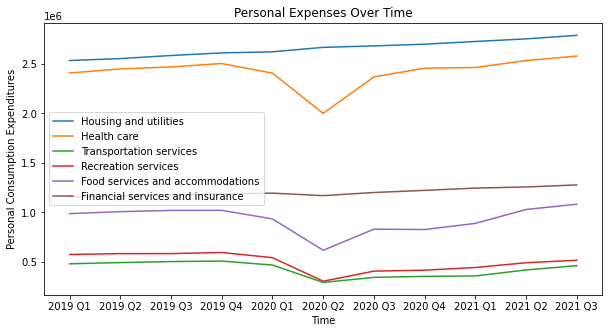

In [17]:
plt.subplots(figsize=(10,5))
for i in range(14,20):
    plt.plot(data[i], label=row_labels[i])
plt.legend()
plt.xticks(np.arange(11), column_labels)
plt.xlabel('Time')
plt.ylabel('Personal Consumption Expenditures')
plt.title('Personal Expenses Over Time')
plt.show()

All of these categories except financial services and housing show a decline during the beginning of the pandemic